In [1]:
import pandas as pd
import numpy as np
import utils
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

In [3]:
type(tracks), type(features)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [4]:
%config Completer.use_jedi = False

In [5]:
features['chroma_cens']['kurtosis']

number,01,02,03,04,05,06,07,08,09,10,11,12
track_id,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,1.038253,1.292235
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,4.326824,1.300406
20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,-0.804761,-0.990958,-0.430381
...,...,...,...,...,...,...,...,...,...,...,...,...
155316,-0.490129,0.463834,2.321970,-0.084352,1.662914,2.115189,-0.237794,5.695442,0.830353,1.951819,-0.190785,-0.186416
155317,-0.461559,-0.229601,-0.496632,-0.422033,0.130612,-0.263825,-0.628103,-0.082687,-0.229483,-0.492753,-0.746905,-0.041635
155318,0.552473,-0.110498,-0.532014,0.263131,-0.224011,-0.530972,1.713526,1.418444,1.325197,0.120333,1.307971,-0.284805


In [6]:
set(features.columns.get_level_values(0))

{'chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'mfcc',
 'rmse',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_rolloff',
 'tonnetz',
 'zcr'}

In [7]:
features['chroma_cens']

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3           1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5           0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10          3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20         -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
...              ...       ...       ...       ...       ...       ...   
155316     -0.490129  0.463834  2.321970 -0.084352  1.662914  2.115189   
155317     -0.461559 -0.229601 -0.496632 -0.422033  0.130612 -0.263825   
155318      0.552473 -0.110498 -0.532014  0.263131 -0.224011 -0.530972   
155319     -0.176901  0.187208 -0.050664  0.368843  0.066005 -0.857354   
155320      0.489665  1.862421  0.854461 -0.103666 -0.249835  0.360283   

statistics                                          ...       std            \
number            07        08        09        10  ...        03        04   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.092350  0.077237   
3           1.366848  1.054094  0.108103  0.619185  ...  0.102759  0.090946   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.100257  0.072991   
10          1.770694  1.604566  0.521217  1.982386  ...  0.056647  0.118345   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.147100  0.112692   
...              ...       ...       ...       ...  ...       ...       ...   
155316     -0.237794  5.695442  0.830353  1.951819  ...  0.145356  0.106066   
155317     -0.628103 -0.082687 -0.229483 -0.492753  ...  0.178551  0.127296   
155318      1.713526  1.418444  1.325197  0.120333  ...  0.149176  0.098879   
155319     -0.780860  0.626281 -0.630938 -0.787229  ...  0.096664  0.129895   
155320     -0.366701  0.033578 -0.834606 -1.154845  ...  0.130722  0.092180   

statistics                                                              \
number            05        06        07        08        09        10   
track_id                                                                 
2           0.074284  0.077322  0.077279  0.068588  0.079606  0.085470   
3           0.075314  0.102431  0.083249  0.100854  0.089236  0.083384   
5           0.071584  0.076366  0.126677  0.131232  0.108912  0.101764   
10          0.080761  0.071630  0.083277  0.069644  0.104290  0.077502   
20          0.130581  0.126656  0.146840  0.165409  0.112400  0.157284   
...              ...       ...       ...       ...       ...       ...   
155316      0.171739  0.136452  0.126534  0.090267  0.093647  0.124365   
155317      0.165922  0.142604  0.123660  0.102164  0.109767  0.159251   
155318      0.134045  0.103426  0.089903  0.083497  0.084681  0.121973   
155319      0.093302  0.151940  0.115668  0.094326  0.120498  0.106149   
155320      0.137882  0.110525  0.111855  0.128800  0.116368  0.166231   

statistics                      
number            11        12  
track_id                        
2           0.085498  0.098219  
3           0.079806  0.071072  
5           0.089526  0.088002  
10          0.074136  0.090781  
20          0.178552  0.137254  
...              ...       ...  
155316      0.095462  0.120004  
155317      0.110519  0.184411  
155318      0.090587  0.111838  
155319      0.103376  0.103931  
155320      0.106998  0.109930  

[106574 rows x 84 columns]

In [8]:
# https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns
tracks.columns = ['_'.join(col) for col in tracks.columns.to_flat_index()]
features.columns = ['_'.join(col) for col in features.columns.to_flat_index()]

In [9]:
smol_tracks = tracks.loc[tracks['set_subset'] == 'small']

In [10]:
smol_tracks.shape

(8000, 52)

In [11]:
smol_tracks.head()

,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
140,1,2008-11-26 01:49:59,2007-05-22,NaN,1,61,<p>Alec K. Redfearn &amp; The Eyesores: Ellen ...,1300,"Alec K. Refearn, Rob Pemberton",[],...,NaN,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires
141,0,2008-11-26 01:49:57,2009-01-16,NaN,1,60,"<p>A full ensamble of strings, drums, electron...",1304,NaN,[],...,NaN,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio


In [12]:
smol_tracks.isna().sum().sort_values(ascending=False)[:25]

track_lyricist              7974
track_publisher             7924
track_information           7841
track_composer              7820
artist_active_year_end      7642
artist_wikipedia_page       7590
track_date_recorded         7535
artist_related_projects     7306
artist_associated_labels    7151
track_language_code         6995
album_engineer              6858
album_producer              6596
artist_active_year_begin    6458
artist_longitude            5101
artist_latitude             5101
artist_members              4475
album_date_released         2663
artist_location             2529
artist_bio                  2086
artist_website              1548
album_information           1498
album_type                   231
track_license                  5
track_interest                 0
track_genres_all               0
dtype: int64

In [13]:
features.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,-0.804761,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [14]:
features.isnull().sum().sort_values(ascending=False)[:5]

chroma_cens_kurtosis_01    0
mfcc_median_13             0
mfcc_skew_03               0
mfcc_skew_02               0
mfcc_skew_01               0
dtype: int64

In [15]:
track_metadata = ['track_genre_top', 'track_title', 'artist_name']

In [16]:
df = features.merge(smol_tracks[track_metadata],
                    left_index=True, right_index=True)

In [17]:
df.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01,track_genre_top,track_title,artist_name
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,Hip-Hop,Food,AWOL
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,Hip-Hop,This World,AWOL
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,Pop,Freeway,Kurt Vile
140,0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,-0.882913,-0.582376,-0.884749,-0.645214,...,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712,Folk,Queen Of The Wires,Alec K. Redfearn & the Eyesores
141,0.172898,-0.284804,-1.169662,-1.062855,-0.706868,-0.708281,-0.204884,0.023624,-0.642770,-0.786291,...,32.994659,0.415527,0.040267,0.034668,0.002930,4.204097,0.028665,Folk,Ohio,Alec K. Redfearn & the Eyesores


In [18]:
for dtype in df.dtypes:
    if dtype != np.number:
        print(dtype)

category
object
object


<ipython-input-18-6ed53c4ae0e6>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype != np.number:


In [19]:
df.index = df.index.astype('string')

These tracks have known issues and are unreadable.

In [20]:
df.drop(['99134', '98567', '98569', '108925', '98565', '133297'], inplace=True)

In [21]:
df.to_csv('../data/features_with_genres.csv')

In [36]:
corr = df.corr()

In [37]:
len(corr.values.flatten())

268324

In [40]:
corr

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
chroma_cens_kurtosis_01,1.000000,0.333799,0.047314,0.183893,0.216923,0.209492,0.145475,0.223332,0.221560,0.172495,...,-0.182373,-0.151990,-0.136600,-0.008573,-0.028872,0.033587,0.045052,-0.002953,-0.026875,-0.009319
chroma_cens_kurtosis_02,0.333799,1.000000,0.090431,0.294354,0.284165,0.172308,0.139419,0.178085,0.320730,0.167317,...,-0.196685,-0.160046,-0.144811,-0.009148,-0.030996,0.058468,0.068913,0.014279,-0.042154,-0.003265
chroma_cens_kurtosis_03,0.047314,0.090431,1.000000,0.136519,0.061075,0.036194,0.066842,0.076790,0.038855,0.053856,...,-0.025665,-0.013930,-0.002361,-0.008530,-0.020845,-0.005047,-0.002326,0.000930,-0.014647,-0.008898
chroma_cens_kurtosis_04,0.183893,0.294354,0.136519,1.000000,0.368300,0.221327,0.159154,0.143106,0.255472,0.125954,...,-0.241133,-0.190101,-0.178557,-0.022580,-0.017248,0.091038,0.100325,0.000624,-0.057835,0.012334
chroma_cens_kurtosis_05,0.216923,0.284165,0.061075,0.368300,1.000000,0.455206,0.199415,0.119762,0.196315,0.150748,...,-0.202567,-0.153066,-0.155795,-0.001363,-0.028221,0.035483,0.047916,-0.000837,-0.023603,-0.015832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zcr_mean_01,0.033587,0.058468,-0.005047,0.091038,0.035483,0.049332,0.044450,-0.000690,0.047863,0.024148,...,-0.335179,-0.359458,-0.357540,-0.235784,0.288176,1.000000,0.936524,0.260580,-0.366380,0.599569
zcr_median_01,0.045052,0.068913,-0.002326,0.100325,0.047916,0.053088,0.053866,0.008212,0.060986,0.029698,...,-0.324748,-0.349183,-0.353846,-0.196111,0.132330,0.936524,1.000000,0.314266,-0.362515,0.331326
zcr_min_01,-0.002953,0.014279,0.000930,0.000624,-0.000837,0.008904,0.037953,-0.001703,-0.010689,0.011585,...,-0.056512,-0.076998,-0.091982,0.042920,-0.014343,0.260580,0.314266,1.000000,0.007259,-0.047815
zcr_skew_01,-0.026875,-0.042154,-0.014647,-0.057835,-0.023603,-0.023223,-0.034288,-0.030090,-0.046899,-0.022305,...,0.243768,0.251667,0.258965,0.849865,0.478248,-0.366380,-0.362515,0.007259,1.000000,-0.012133


In [56]:
len(np.triu(corr).flatten())

268324

In [66]:
corr_values = [value for value in np.triu(corr).flatten() if (value != 1) and (value != 0)]
max(corr_values)

0.9955111394165266

In [68]:
for value in corr_values:
    if value == 0:
        print('its a 0')

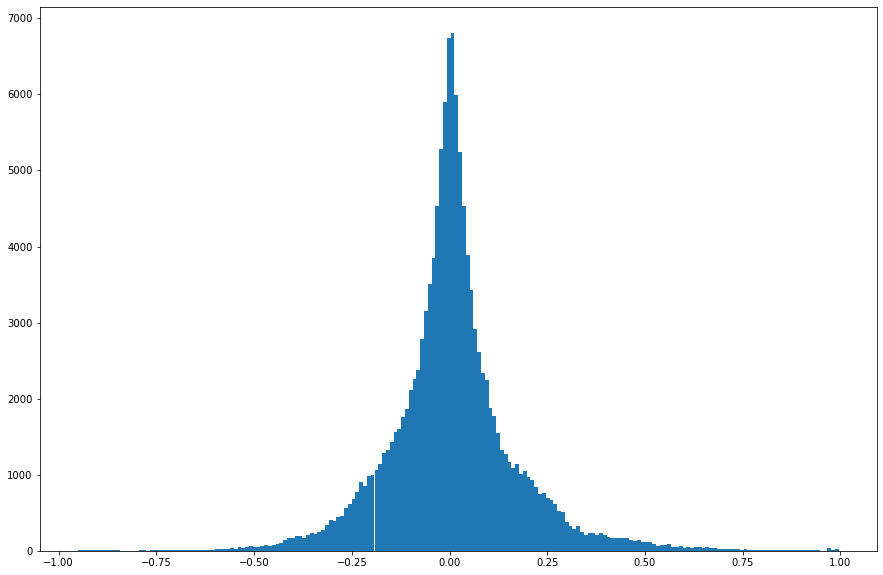

In [70]:
plt.figure(figsize = (15,10))
plt.hist(corr_values, bins=200);

## Free Lunch Analysis

In [23]:
X = df.drop(columns=track_metadata)
y = df['track_genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

In [24]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [24]:
forest = RandomForestClassifier(max_depth = 3, n_estimators = 1000)
forest.fit(X_train_sc, y_train)
forest.score(X_test_sc, y_test), forest.score(X_train_sc, y_train)

(0.4185, 0.44416666666666665)

In [25]:
X_train.shape

(6000, 518)

In [26]:
y_train.value_counts(normalize=True)

Electronic             0.125
Experimental           0.125
Folk                   0.125
Hip-Hop                0.125
Instrumental           0.125
International          0.125
Pop                    0.125
Rock                   0.125
Blues                  0.000
Classical              0.000
Country                0.000
Easy Listening         0.000
Jazz                   0.000
Old-Time / Historic    0.000
Soul-RnB               0.000
Spoken                 0.000
Name: track_genre_top, dtype: float64

In [27]:
X_train.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
track_id,,,,,,,,,,,,,,,,,,,,,
13201,0.420879,-0.822415,-0.853196,0.464956,3.814499,0.425468,-0.947115,-1.060195,-0.475784,-0.689962,...,0.105723,0.018722,0.019031,12.586129,0.429199,0.062467,0.055664,0.0,2.446809,0.045005
112585,-0.672624,-0.335451,-0.110136,-0.218467,0.169417,0.010902,0.672023,0.139868,-0.694096,-0.767099,...,0.058745,0.017428,0.017723,7.194702,0.481934,0.076092,0.059570,0.0,2.291025,0.060461
119979,-0.876021,-0.795852,-0.918822,-1.041375,-0.998280,-0.886390,-0.382970,0.392757,-0.258268,-0.598918,...,0.047526,0.016716,0.010916,3.456737,0.495117,0.079870,0.044922,0.0,1.957966,0.101695
60331,11.559152,12.706867,-1.306750,-1.148779,-1.239072,2.460004,3.498828,5.826253,8.835379,13.576900,...,0.087272,0.020342,0.013623,-0.644161,0.343262,0.085409,0.095215,0.0,0.038523,0.058724
113260,-0.768486,-0.760685,0.382141,-0.374696,-0.447805,-1.324002,-0.983642,0.612836,-0.132008,-0.511389,...,0.125314,0.028787,0.028133,8.704784,0.206055,0.034916,0.029297,0.0,2.401070,0.024702


In [28]:
518**.5

22.759613353482084

In [29]:
gbm = GradientBoostingClassifier(min_samples_split = 10, subsample = 1,
                                 max_features = 'sqrt', n_iter_no_change = 5,
                                 n_estimators = 500, learning_rate = .0001,
                                 tol = .0001, verbose=1)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test), gbm.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           2.0794            2.05m
         2           2.0793            2.02m
         3           2.0792            2.00m
         4           2.0791            1.99m
         5           2.0790            1.98m
         6           2.0789            1.98m
         7           2.0788            1.97m
         8           2.0787            1.96m
         9           2.0786            1.96m
        10           2.0785            1.96m
        20           2.0776            1.92m
        30           2.0766            1.88m
        40           2.0756            1.84m
        50           2.0747            1.80m
        60           2.0737            1.76m
        70           2.0728            1.72m
        80           2.0719            1.68m
        90           2.0709            1.64m
       100           2.0700            1.60m
       200           2.0607            1.20m
       300           2.0518           48.15s
       40

(0.464, 0.5426666666666666)

In [30]:
(gbm.predict(X_test) == y_test).mean()

0.464

In [31]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', C = .01, max_iter = 1000)
lr.fit(X_train_sc, y_train)

C:\Users\098uy\anaconda3\envs\audio_project\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.01, max_iter=1000, penalty='l1', solver='saga')

In [32]:
lr.score(X_test_sc, y_test), lr.score(X_train_sc, y_train)

(0.5175, 0.5245)

In [33]:
518**.5

22.759613353482084

In [34]:
pca = PCA()
pca.fit(X_train_sc)

PCA()

In [35]:
sum([round(val, 5) for val in pca.explained_variance_ratio_][:100])

0.8402800000000001

In [36]:
len(X_train)

6000

In [37]:
6000**.5

77.45966692414834

In [38]:
pca = PCA(518)
pca.fit(X_train_sc)

PCA(n_components=518)

In [39]:
X_train_pca = pd.DataFrame(pca.transform(X_train_sc))
X_test_pca = pd.DataFrame(pca.transform(X_test_sc))

In [40]:
forest = RandomForestClassifier(max_depth = 3, n_estimators = 1000)
forest.fit(X_train_pca, y_train)
forest.score(X_test_pca, y_test), forest.score(X_train_pca, y_train)

(0.4725, 0.5315)

In [102]:
lr = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = .01,
                        max_iter = 2000)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=0.01, max_iter=2000, solver='newton-cg')

In [103]:
lr.score(X_test_pca, y_test), lr.score(X_train_pca, y_train)

(0.576, 0.6773333333333333)

In [43]:
X_train_pca.corr()

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,1.000000e+00,4.995281e-16,-3.041345e-16,-1.466973e-16,-7.664502e-17,2.597042e-16,-2.250543e-16,8.029899e-16,-3.179501e-16,1.233572e-16,...,5.619843e-15,-6.676267e-15,-1.041811e-14,-2.346798e-15,8.963992e-15,2.425589e-14,1.260467e-14,-1.252784e-14,1.904827e-14,7.207174e-14
1,4.995281e-16,1.000000e+00,-3.557283e-18,2.101589e-16,6.801712e-16,-2.083903e-16,6.521918e-16,-1.111631e-16,-2.021850e-16,-5.891550e-16,...,6.666928e-15,-8.049482e-15,-2.867763e-15,-1.376164e-14,-3.214601e-15,-7.518697e-16,5.218965e-15,6.230426e-16,1.954364e-14,3.306586e-14
2,-3.041345e-16,-3.557283e-18,1.000000e+00,5.980546e-16,-4.345650e-16,7.153779e-17,-2.573860e-16,2.582907e-16,8.487840e-17,-3.186525e-16,...,-2.136582e-16,-3.605645e-15,4.228766e-15,-3.897161e-15,-4.323327e-15,-2.208224e-14,8.315001e-15,5.024832e-15,1.694331e-14,-2.565918e-14
3,-1.466973e-16,2.101589e-16,5.980546e-16,1.000000e+00,-4.179815e-17,-1.010954e-16,-5.978554e-17,3.052142e-16,-1.642046e-16,-7.687968e-16,...,1.441801e-16,-9.915777e-16,-6.873975e-15,-3.453529e-15,-1.332316e-16,2.898104e-14,-4.819439e-15,2.379316e-14,9.080796e-15,-2.563770e-15
4,-7.664502e-17,6.801712e-16,-4.345650e-16,-4.179815e-17,1.000000e+00,3.722854e-16,-2.947684e-16,3.866570e-16,2.657483e-17,-5.830527e-16,...,9.519218e-16,2.324071e-15,2.432605e-15,-3.363625e-16,-1.405921e-15,-1.702433e-15,-1.419679e-14,-1.362894e-14,-1.828570e-14,-9.135125e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2.425589e-14,-7.518697e-16,-2.208224e-14,2.898104e-14,-1.702433e-15,4.906892e-15,-9.065236e-15,-1.030918e-14,7.667622e-15,-1.903658e-14,...,-8.063345e-16,3.360781e-16,1.861328e-15,1.467096e-15,-1.855110e-18,1.000000e+00,1.463852e-15,-4.216858e-15,-5.091000e-15,1.454756e-15
514,1.260467e-14,5.218965e-15,8.315001e-15,-4.819439e-15,-1.419679e-14,7.395611e-15,-4.669815e-15,-6.707758e-15,-2.689189e-15,4.042638e-15,...,-4.124036e-16,9.404675e-16,2.037610e-16,-2.642330e-15,-2.250497e-15,1.463852e-15,1.000000e+00,4.042114e-16,2.807249e-15,-9.978746e-16
515,-1.252784e-14,6.230426e-16,5.024832e-15,2.379316e-14,-1.362894e-14,-4.094644e-14,9.157722e-15,7.265077e-15,1.150353e-14,-2.299116e-15,...,-8.437125e-17,-1.847972e-15,-9.404185e-16,-3.511537e-16,-4.907699e-16,-4.216858e-15,4.042114e-16,1.000000e+00,-6.323095e-16,1.737637e-15
516,1.904827e-14,1.954364e-14,1.694331e-14,9.080796e-15,-1.828570e-14,2.199879e-14,7.232642e-16,-2.895380e-15,-4.159120e-14,-6.382752e-15,...,-1.011040e-15,7.767812e-16,7.091412e-16,3.222781e-15,1.098977e-16,-5.091000e-15,2.807249e-15,-6.323095e-16,1.000000e+00,2.092160e-15


## Chroma Cens Analysis

{'chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'mfcc',
 'rmse',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_rolloff',
 'tonnetz',
 'zcr'}

In [171]:
chroma_cens_cols = [col for col in df.columns if 'chroma_cens' in col]
tonnetz_cols = [col for col in df.columns if 'tonnetz' in col]
spectral_bdwth_cols = [col for col in df.columns if 'spectral_bandwidth' in col]
mfcc_cols = [col for col in df.columns if 'mfcc' in col]

In [79]:
X = df.drop(columns=track_metadata)[chroma_cens_cols]
y = df['track_genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

In [80]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [101]:
pca = PCA(60)
pca.fit(X_train_sc)

PCA(n_components=60)

In [102]:
6000**.5

77.45966692414834

In [103]:
len(X_train.columns)

84

In [104]:
sum([round(val, 5) for val in pca.explained_variance_ratio_][:60])

0.9876299999999999

In [105]:
pca = PCA(30)
pca.fit(X_train_sc)

PCA(n_components=30)

In [106]:
X_train_pca = pd.DataFrame(pca.transform(X_train_sc))
X_test_pca = pd.DataFrame(pca.transform(X_test_sc))

In [107]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', C = .01, max_iter = 1000)
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test), lr.score(X_train_sc, y_train)

(0.2355, 0.24633333333333332)

In [108]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', C = .01, max_iter = 1000)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test), lr.score(X_train_pca, y_train)

(0.2515, 0.25333333333333335)

## Tonnetz Analysis

In [109]:
X = df.drop(columns=track_metadata)[tonnetz_cols]
y = df['track_genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

In [110]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [121]:
pca = PCA()
pca.fit(X_train_sc)

PCA()

In [122]:
6000**.5

77.45966692414834

In [123]:
len(X_train.columns)

42

In [148]:
sum([round(val, 5) for val in pca.explained_variance_ratio_][:25])

0.9680099999999999

In [149]:
pca = PCA(25)
pca.fit(X_train_sc)

PCA(n_components=25)

In [150]:
X_train_pca = pd.DataFrame(pca.transform(X_train_sc))
X_test_pca = pd.DataFrame(pca.transform(X_test_sc))

In [151]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', C = .01, max_iter = 1000)
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test), lr.score(X_train_sc, y_train)

(0.2615, 0.26366666666666666)

In [152]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', C = .01, max_iter = 1000)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test), lr.score(X_train_pca, y_train)

(0.237, 0.25733333333333336)

## MFCC Analysis

In [172]:
X = df.drop(columns=track_metadata)[mfcc_cols]
y = df['track_genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

In [173]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [174]:
pca = PCA()
pca.fit(X_train_sc)

PCA()

In [175]:
6000**.5

77.45966692414834

In [176]:
len(X_train.columns)

140

In [183]:
sum([round(val, 5) for val in pca.explained_variance_ratio_][:55])

0.91656

In [184]:
pca = PCA(55)
pca.fit(X_train_sc)

PCA(n_components=55)

In [185]:
X_train_pca = pd.DataFrame(pca.transform(X_train_sc))
X_test_pca = pd.DataFrame(pca.transform(X_test_sc))

In [186]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', C = .01, max_iter = 1000)
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test), lr.score(X_train_sc, y_train)

(0.4575, 0.4696666666666667)

In [187]:
lr = LogisticRegression(penalty = 'l1', solver = 'saga', C = .01, max_iter = 1000)
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test), lr.score(X_train_pca, y_train)

(0.4595, 0.4625)

In [188]:
gbm = GradientBoostingClassifier(min_samples_split = 10, subsample = 1,
                                 max_features = 'sqrt', n_iter_no_change = 5,
                                 n_estimators = 500, learning_rate = .0001,
                                 tol = .0001, verbose=1)
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test), gbm.score(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           2.0794            1.12m
         2           2.0793            1.11m
         3           2.0792            1.09m
         4           2.0791            1.09m
         5           2.0790            1.08m
         6           2.0789            1.08m
         7           2.0788            1.09m
         8           2.0787            1.09m
         9           2.0786            1.10m
        10           2.0785            1.09m
        20           2.0777            1.06m
        30           2.0768            1.03m
        40           2.0759            1.01m
        50           2.0750           58.87s
        60           2.0742           57.45s
        70           2.0733           56.31s
        80           2.0724           55.04s
        90           2.0715           53.74s
       100           2.0707           52.43s
       200           2.0621           39.09s
       300           2.0536           26.02s
       40

(0.455, 0.5151666666666667)

In [189]:
gbm = GradientBoostingClassifier(min_samples_split = 10, subsample = 1,
                                 max_features = 'sqrt', n_iter_no_change = 5,
                                 n_estimators = 500, learning_rate = .0001,
                                 tol = .0001, verbose=1)
gbm.fit(X_train_pca, y_train)
gbm.score(X_test_pca, y_test), gbm.score(X_train_pca, y_train)

      Iter       Train Loss   Remaining Time 
         1           2.0794           45.01s
         2           2.0793           44.64s
         3           2.0793           45.51s
         4           2.0793           45.18s
         5           2.0792           44.79s
         6           2.0792           44.74s
         7           2.0791           44.63s
         8           2.0791           44.38s
         9           2.0790           44.31s
        10           2.0790           44.11s
        20           2.0785           42.81s
        30           2.0780           41.73s
        40           2.0775           40.83s
        50           2.0770           39.80s
        60           2.0764           38.78s
        70           2.0760           37.80s
        80           2.0755           36.87s
        90           2.0750           35.96s
       100           2.0745           35.03s
       200           2.0698           26.13s
       300           2.0650           17.43s
       40

(0.4445, 0.5128333333333334)

In [48]:
y, sr = librosa.load('../data/fma_small/065/065488.mp3', sr=48000)

C:\Users\098uy\anaconda3\envs\audio_project\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [49]:
len(y), 48000 * 30

(1439471, 1440000)

Librosa has a default sampling rate of 22,050 hertz. Audio track is ~30s long.

In [50]:
y[50000:50020]

array([-0.11154175, -0.10891724, -0.10017395, -0.08799744, -0.0776825 ,
       -0.07331848, -0.07492065, -0.07995605, -0.08572388, -0.09016418,
       -0.09378052, -0.09928894, -0.10588074, -0.10832214, -0.10362244,
       -0.09367371, -0.08152771, -0.07066345, -0.06495667, -0.06567383],
      dtype=float32)

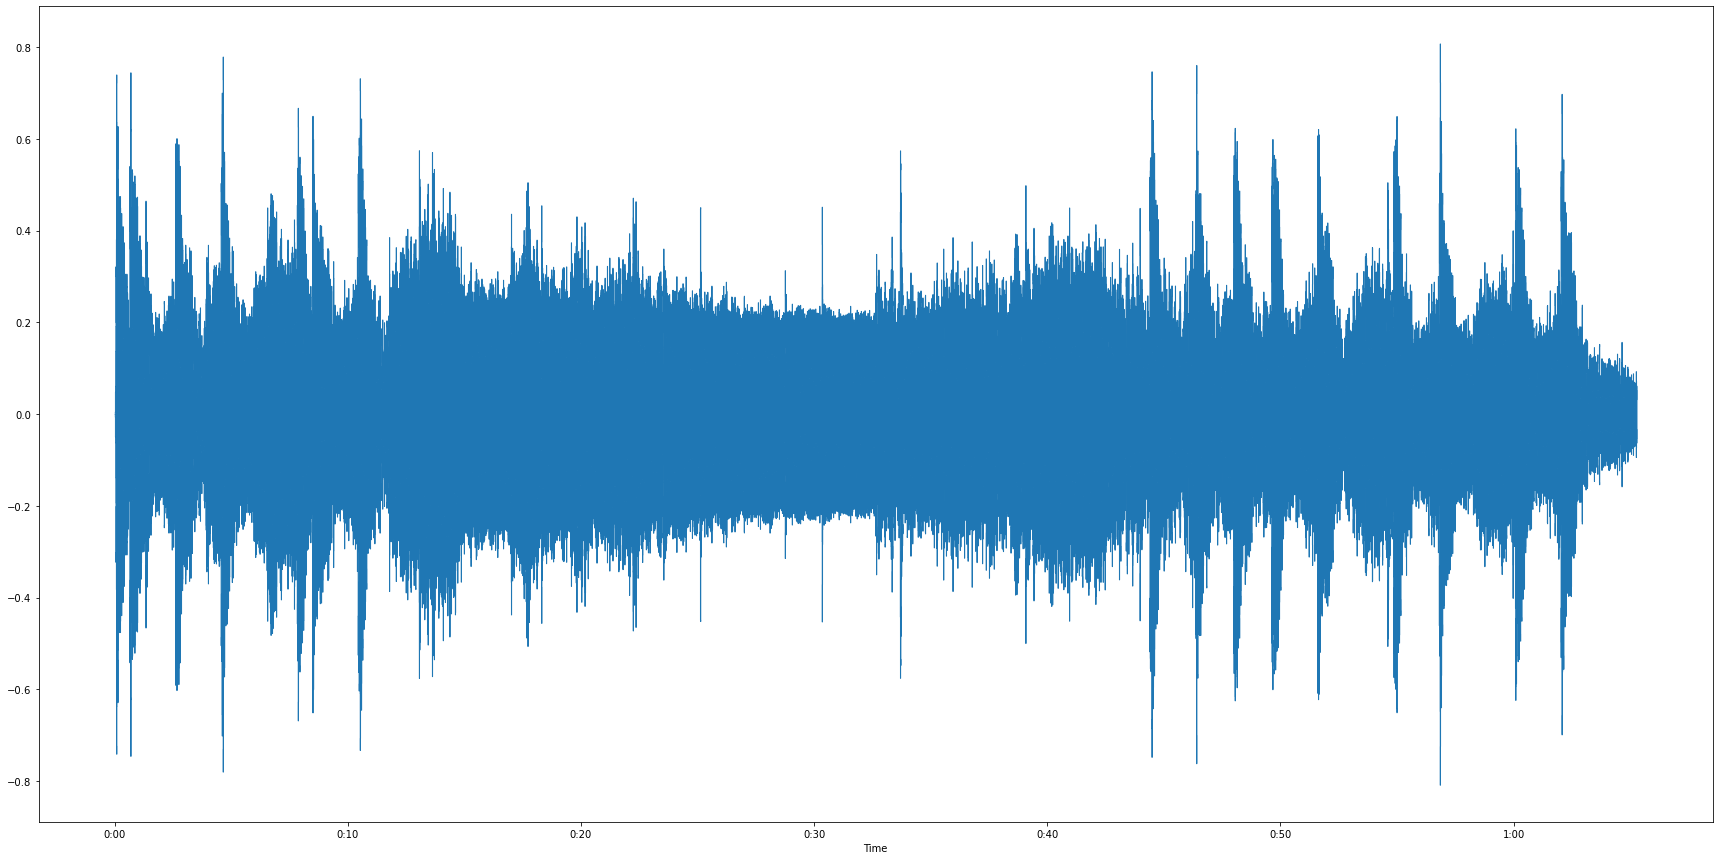

In [51]:
fig = plt.figure(figsize = (30, 15))
librosa.display.waveshow(y);

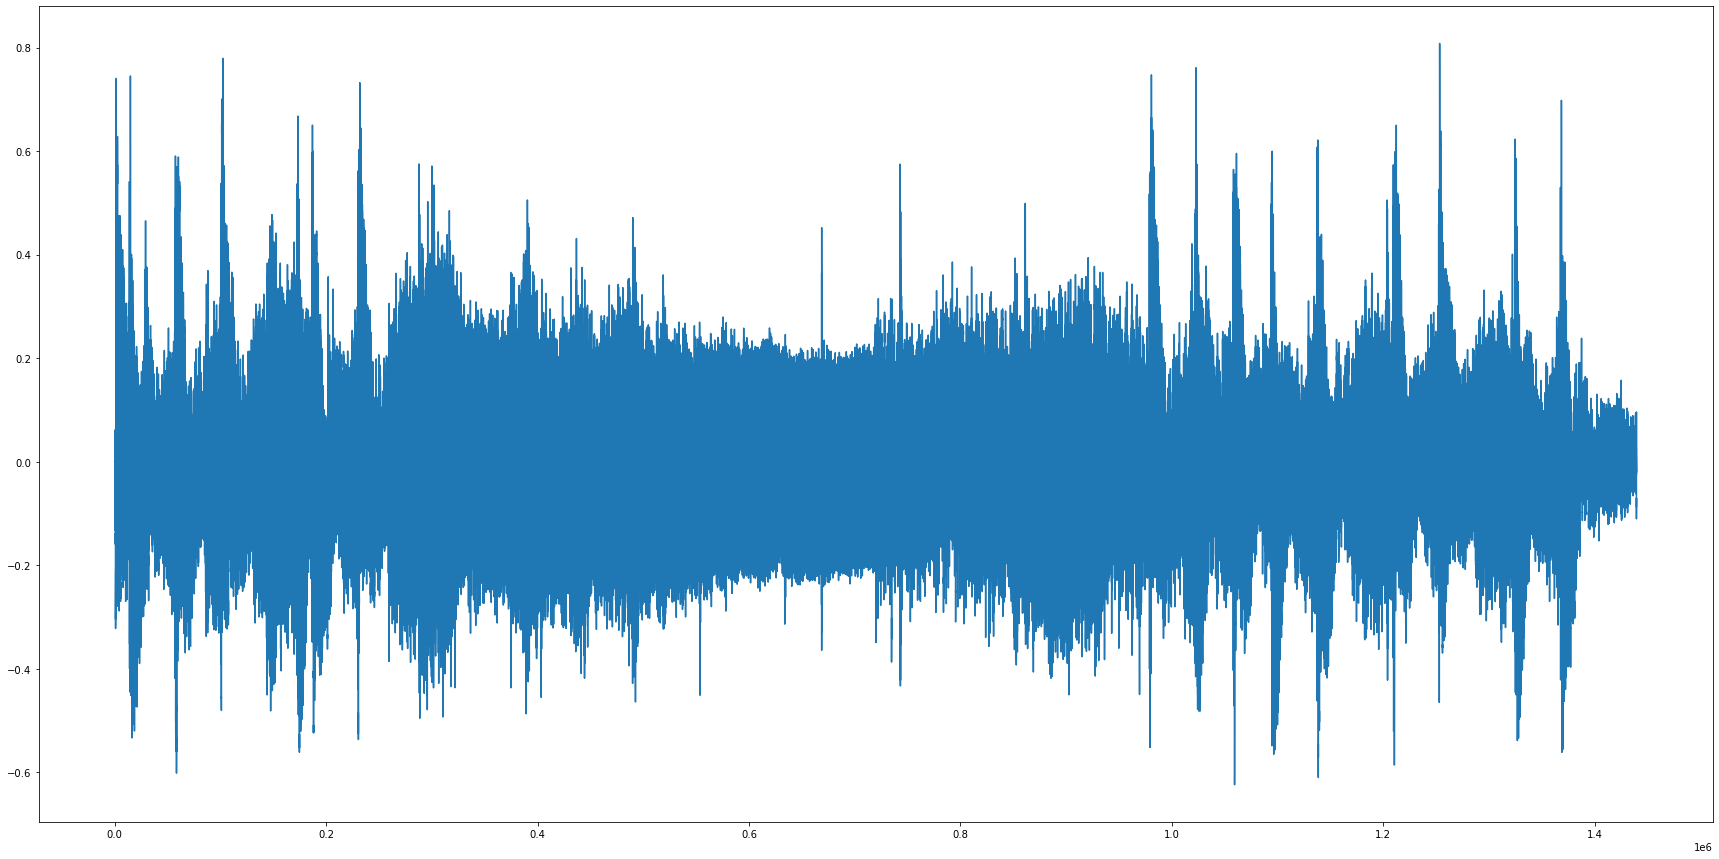

In [52]:
fig = plt.figure(figsize= (30, 15))
plt.plot(y)

In [53]:
mfcc = librosa.feature.mfcc(y, hop_length=512)

In [50]:
mfcc[0]

array([-375.26352, -303.60452, -279.19446, ..., -360.68008, -312.98932,
       -233.67032], dtype=float32)

In [51]:
mfcc.shape

(20, 2812)

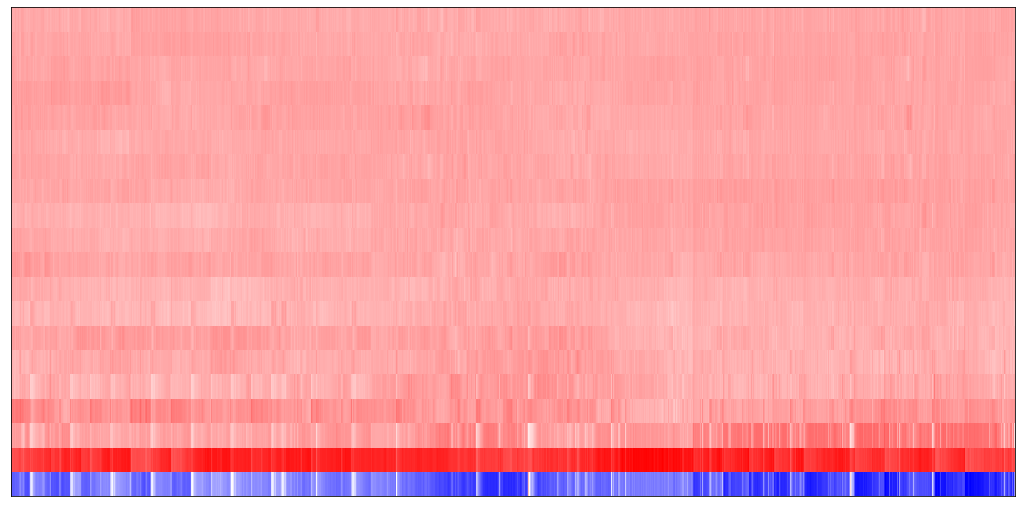

In [97]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(mfcc, cmap='bwr')

In [53]:
mfcc_delta = librosa.feature.delta(mfcc)

In [54]:
# look more into this
mfcc_delta.shape

(20, 2812)

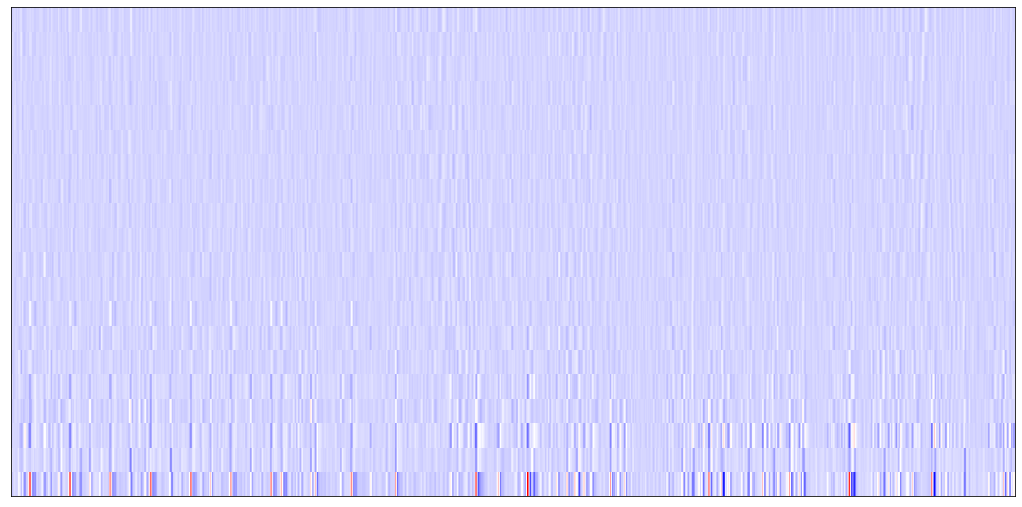

In [98]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(mfcc_delta, cmap='bwr')

In [56]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [57]:
y_harmonic.shape, y_percussive.shape

((1439471,), (1439471,))

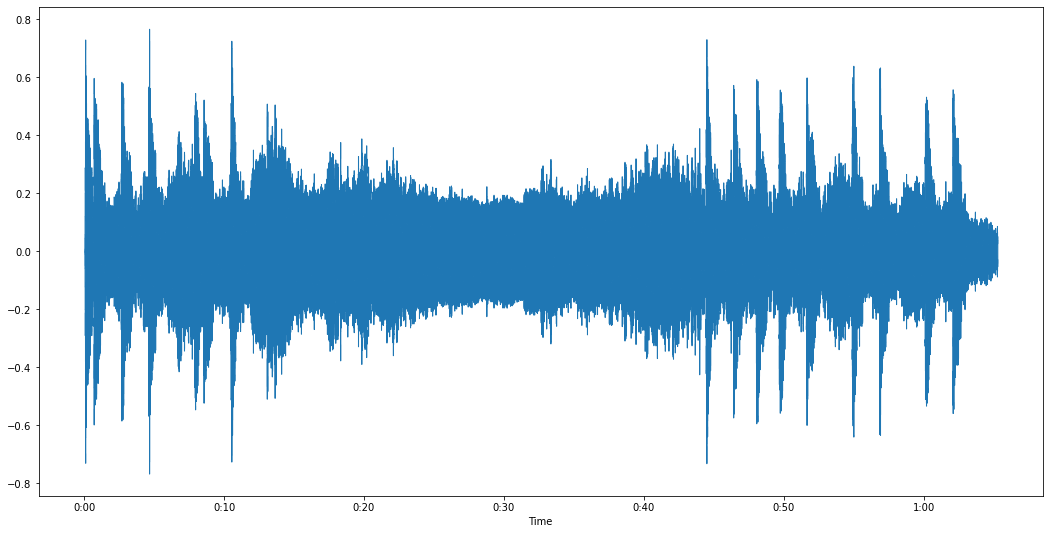

In [99]:
fig = plt.figure(figsize = (18, 9))
librosa.display.waveshow(y_harmonic)

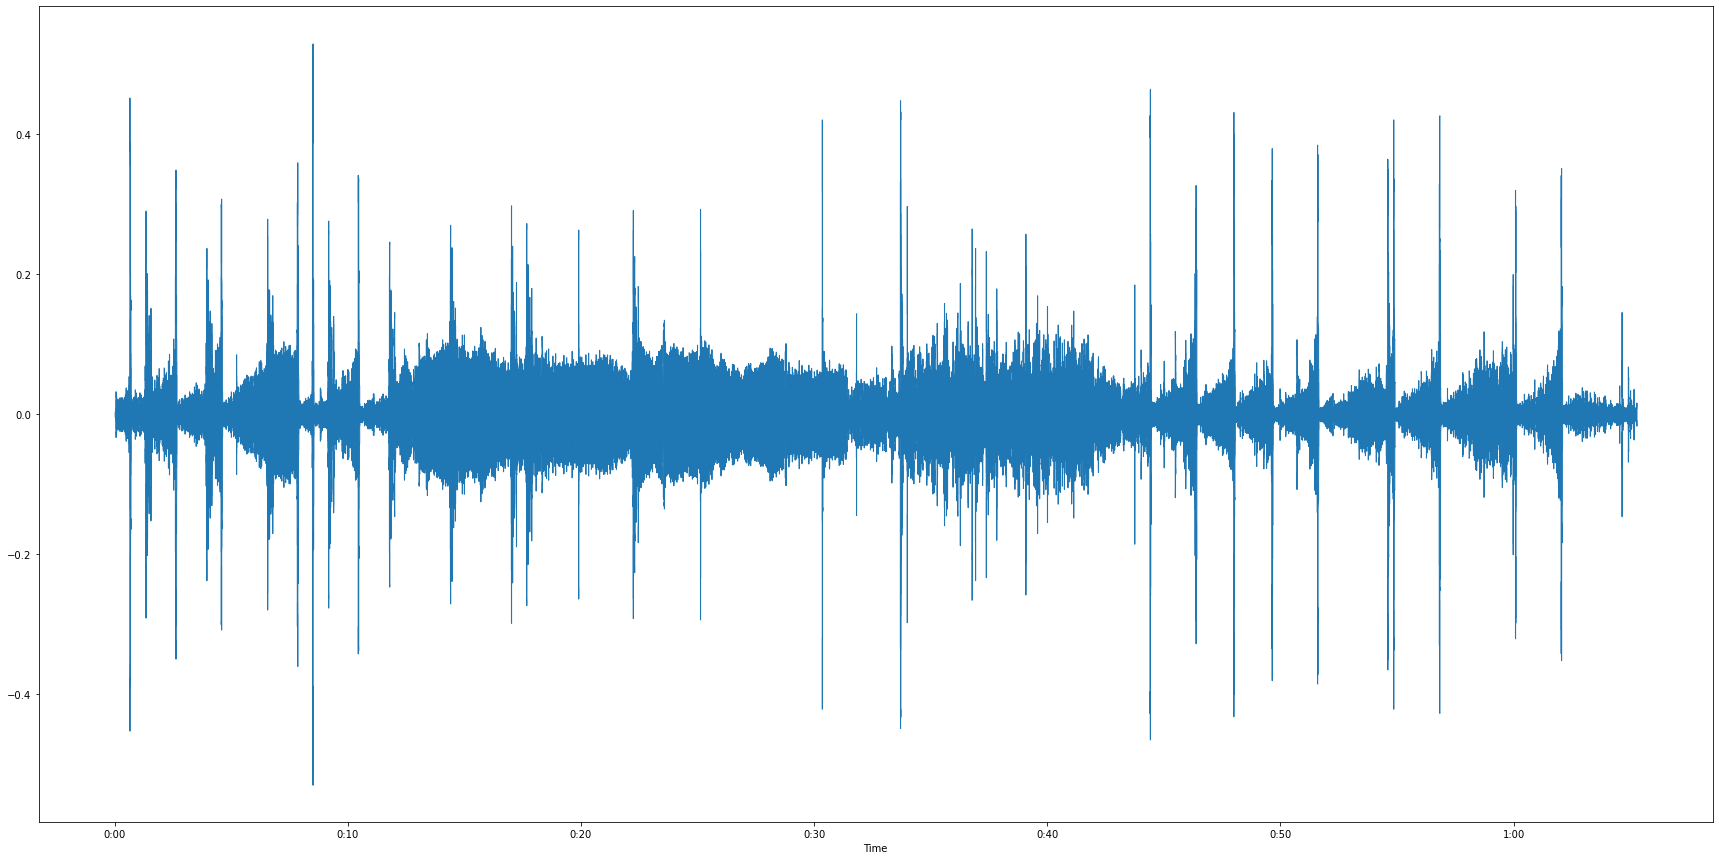

In [59]:
fig = plt.figure(figsize = (18, 9))
librosa.display.waveshow(y_percussive)

In [60]:
sf.write('percussive_test_file_48000.wav', y_percussive, 48000)

In [61]:
sf.write('harmonic_test_file_48000.wav', y_harmonic, 48000)

In [62]:
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr = 48000)

In [63]:
tempo

100.44642857142857

In [64]:
print(beat_frames.shape)
beat_frames

(50,)


array([   3,   57,  113,  170,  226,  282,  337,  395,  450,  507,  563,
        619,  676,  733,  795,  857,  909,  958, 1012, 1082, 1139, 1196,
       1254, 1307, 1370, 1421, 1476, 1533, 1584, 1630, 1683, 1733, 1784,
       1843, 1897, 1959, 2014, 2075, 2124, 2184, 2238, 2292, 2352, 2407,
       2463, 2529, 2583, 2635, 2689, 2743])

In [65]:
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), beat_frames)

In [66]:
beat_mfcc_delta.shape

(40, 51)

more filters later

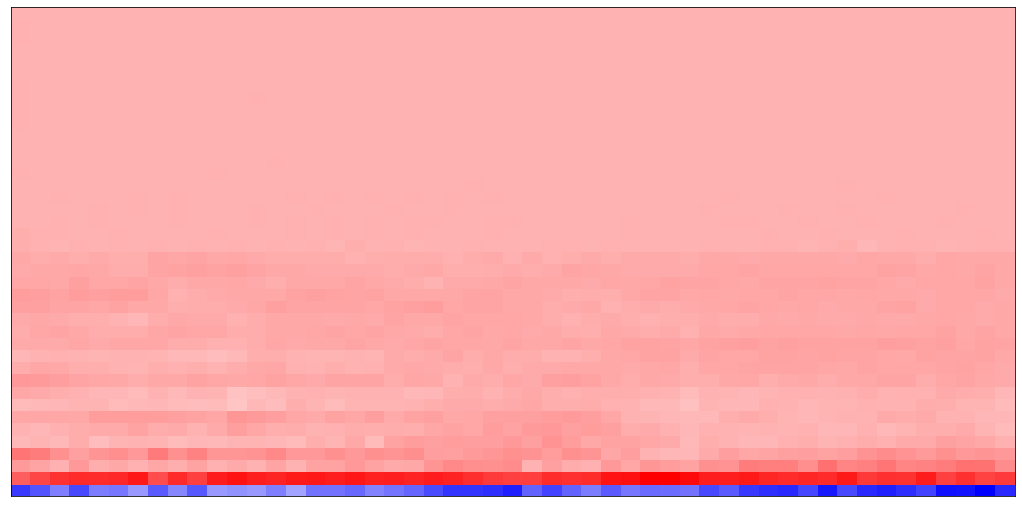

In [100]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(beat_mfcc_delta, cmap='bwr')

In [61]:
len(y_harmonic)

1439471

In [62]:
1439471 / 512

2811.466796875

In [57]:
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr= 48000)

In [58]:
chromagram.shape

(12, 2812)

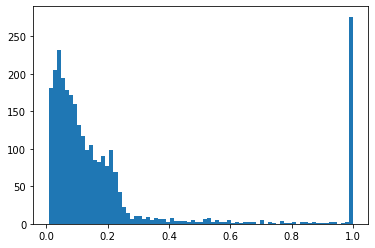

In [68]:
plt.hist(chromagram[0], bins = 75);

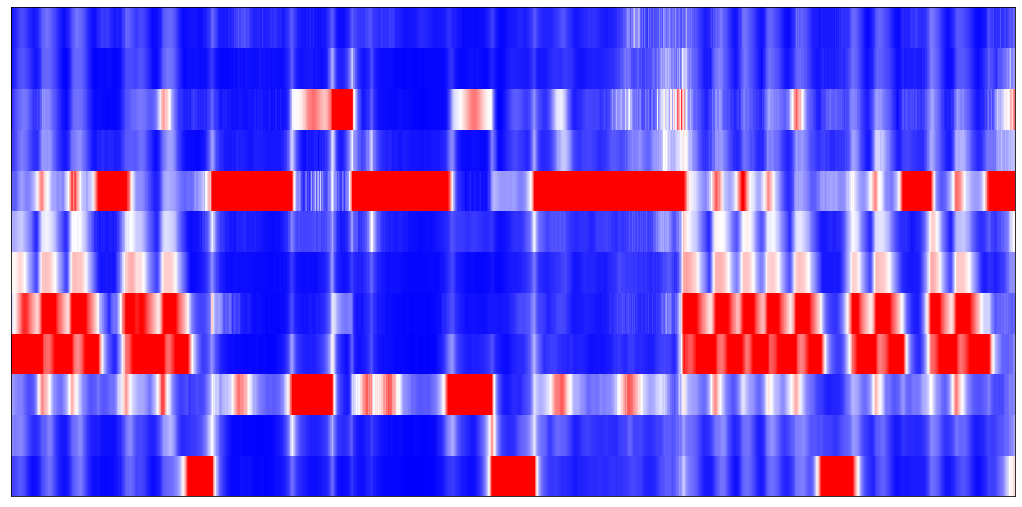

In [101]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(chromagram, cmap='bwr')

In [71]:
beat_chroma = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

In [72]:
beat_chroma.shape

(12, 51)

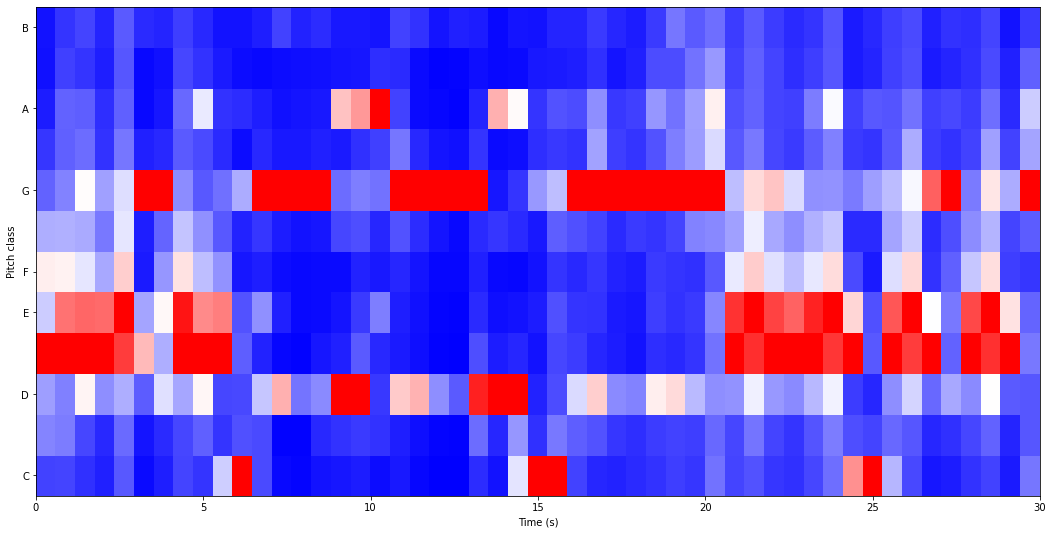

In [96]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(beat_chroma, cmap='bwr', sr = 870,
                         x_axis = 's', y_axis = 'chroma')

In [74]:
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [75]:
beat_features.shape

(52, 51)

In [76]:
pd.DataFrame(beat_features)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.140591,0.143195,0.103118,0.073659,0.182720,0.030481,0.067744,0.143341,0.112983,0.410379,...,0.718724,1.000000,0.362366,0.150746,0.052955,0.064587,0.106315,0.138361,0.061327,0.240933
1,0.268241,0.251624,0.147504,0.090298,0.214915,0.048427,0.092101,0.147165,0.197657,0.112224,...,0.161562,0.141423,0.212489,0.178161,0.085869,0.105818,0.145367,0.202202,0.081068,0.175876
2,0.315231,0.257086,0.524504,0.285720,0.348350,0.189084,0.446223,0.333543,0.520590,0.148376,...,0.128740,0.084215,0.284878,0.419671,0.210965,0.336595,0.278612,0.506896,0.185177,0.179448
3,1.000000,1.000000,1.000000,1.000000,0.881800,0.636310,0.346864,1.000000,1.000000,1.000000,...,1.000000,0.182154,1.000000,0.882403,1.000000,0.199461,1.000000,0.905861,1.000000,0.245042
4,0.404290,0.776869,0.802358,0.792786,1.000000,0.330113,0.516725,0.958284,0.729286,0.753970,...,0.583098,0.164307,0.831907,1.000000,0.501834,0.242835,0.857405,1.000000,0.561245,0.205216
5,0.538746,0.528688,0.458218,0.336409,0.601165,0.061027,0.300690,0.558972,0.379746,0.292511,...,0.155357,0.063477,0.441416,0.580075,0.109641,0.196147,0.394860,0.567653,0.130442,0.117120
6,0.349541,0.349945,0.341969,0.244826,0.454802,0.069336,0.206167,0.389500,0.288646,0.181487,...,0.091605,0.094493,0.328088,0.405336,0.095238,0.162548,0.282916,0.361043,0.141781,0.188217
7,0.200043,0.261891,0.508728,0.321712,0.442475,1.000000,1.000000,0.281811,0.181256,0.228343,...,0.246420,0.315980,0.374979,0.490328,0.813232,1.000000,0.248570,0.554804,0.345767,1.000000
8,0.117074,0.196168,0.218642,0.106623,0.237961,0.071887,0.088645,0.185300,0.152867,0.092848,...,0.125047,0.111414,0.182561,0.343713,0.125788,0.109324,0.138055,0.319564,0.138823,0.328372
9,0.065563,0.202384,0.194104,0.098748,0.198205,0.025479,0.053826,0.212908,0.463606,0.108947,...,0.135583,0.183011,0.175663,0.231772,0.133710,0.149412,0.128276,0.225066,0.091169,0.405565
